In [73]:
import pandas as pd
import numpy as np

import plotly.offline as py 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [10]:
americaOrigin = pd.read_csv("Bank_of_America_data.csv")

In [8]:
from DS2Pipe.Prepro import Prepro

In [4]:
america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [11]:
americaOrigin.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [12]:
america_cat = americaOrigin.select_dtypes(include=['object'])
america_cat.head()

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,NaN,NaN
4,HomeImp,Office


In [13]:
americaOrigin.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [39]:
def QualiQuantiDecomposition(data):
    data_cat = data.select_dtypes(include=['object'])
    data_num = data._get_numeric_data()
    
    data_cat = pd.concat([data_num['DEROG'], data_cat], axis=1)
    data_cat = pd.concat([data_num['DELINQ'], data_cat], axis=1)
    data_cat = pd.concat([data_num['NINQ'], data_cat], axis=1)
    
    data_num.drop(['DEROG', 'DELINQ', 'NINQ'], axis=1, inplace = True)
        
    return data_num, data_cat
    

In [40]:
america_num, america_cat = QualiQuantiDecomposition(americaOrigin.drop('BAD', axis=1))

In [41]:
america_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 7 columns):
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
YOJ        5445 non-null float64
CLAGE      5652 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(6), int64(1)
memory usage: 326.0 KB


In [42]:
america_num.corr()

,LOAN,MORTDUE,VALUE,YOJ,CLAGE,CLNO,DEBTINC
LOAN,1.000000,0.228595,0.335393,0.105728,0.088540,0.072631,0.084735
MORTDUE,0.228595,1.000000,0.875666,-0.088480,0.140047,0.323631,0.154939
VALUE,0.335393,0.875666,1.000000,0.007759,0.171238,0.269149,0.132174
YOJ,0.105728,-0.088480,0.007759,1.000000,0.201718,0.024838,-0.055891
CLAGE,0.088540,0.140047,0.171238,0.201718,1.000000,0.237987,-0.046477
CLNO,0.072631,0.323631,0.269149,0.024838,0.237987,1.000000,0.185539
DEBTINC,0.084735,0.154939,0.132174,-0.055891,-0.046477,0.185539,1.000000


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



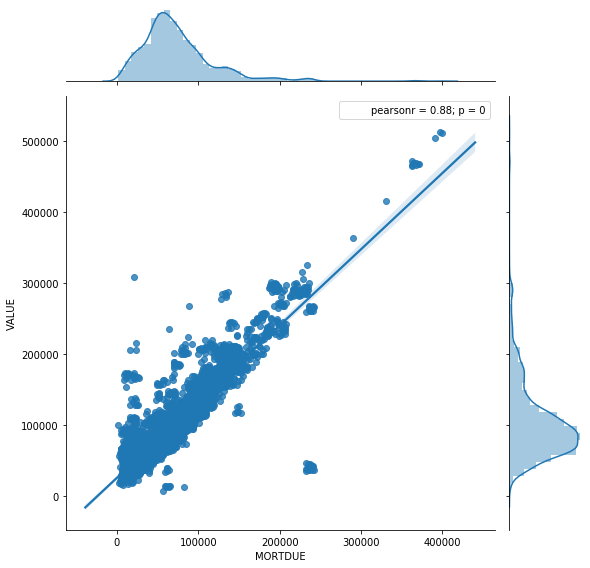

In [74]:
import scipy.stats as stats
r1 = sns.jointplot(x="MORTDUE",y="VALUE", data=america_num, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

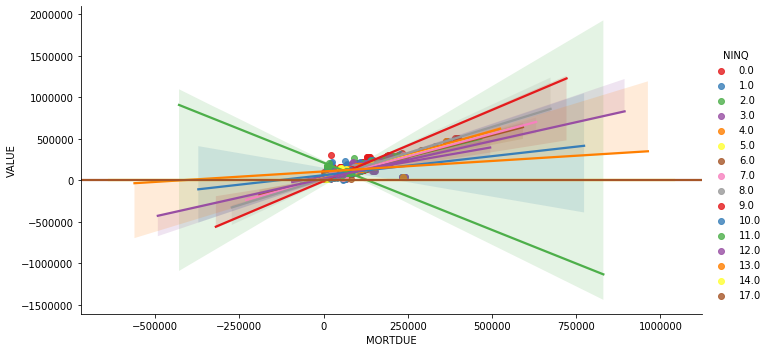

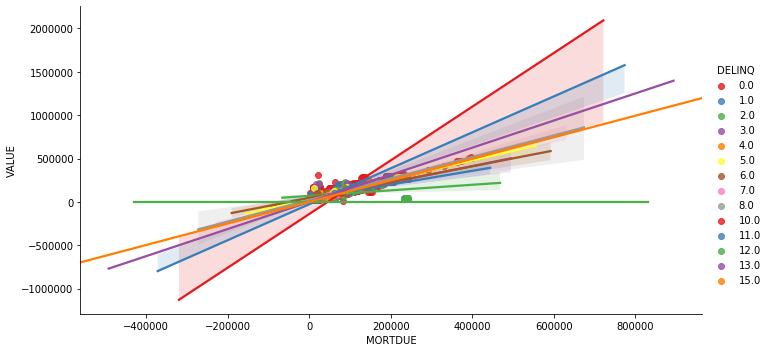

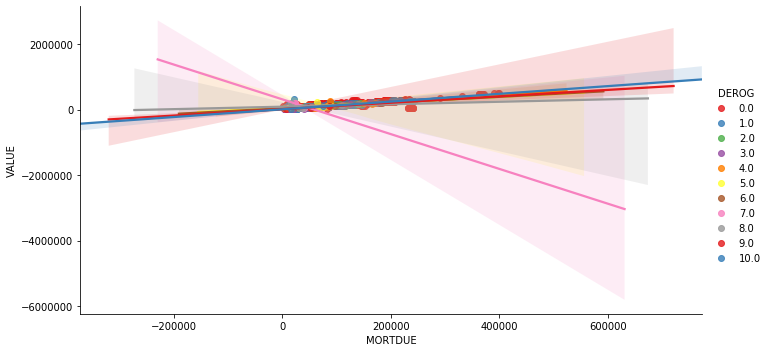

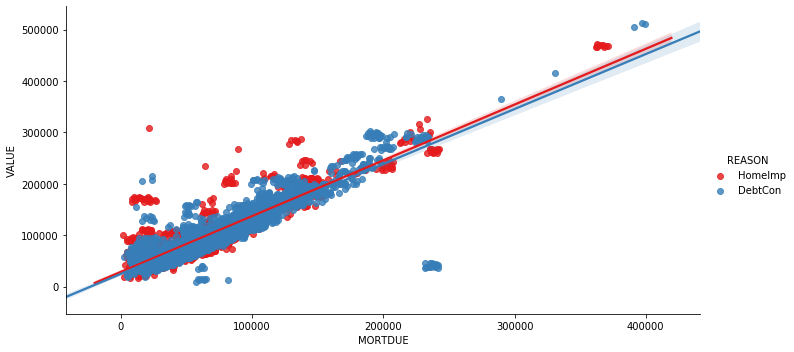

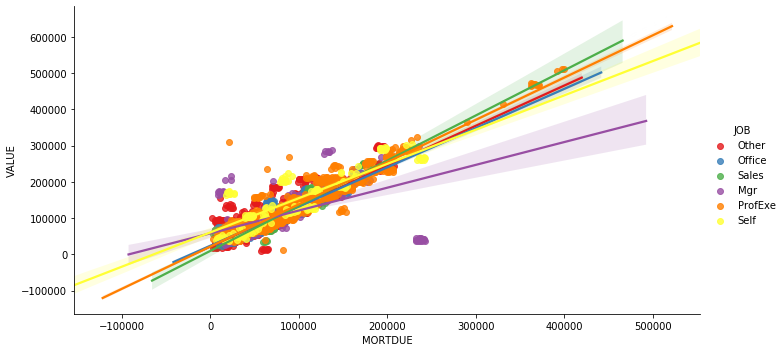

In [44]:
for i in america_cat.columns:
    sns.lmplot(x="MORTDUE",y="VALUE", hue=i, data=americaOrigin, palette="Set1", aspect=2)
    plt.show()

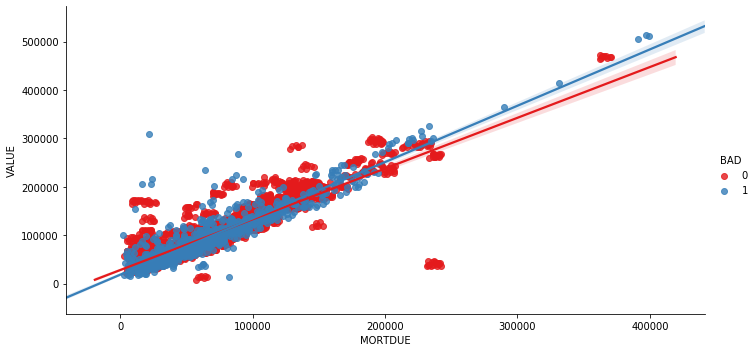

In [72]:
sns.lmplot(x="MORTDUE",y="VALUE", hue='BAD', data=americaOrigin, palette="Set1", aspect=2)
plt.show()

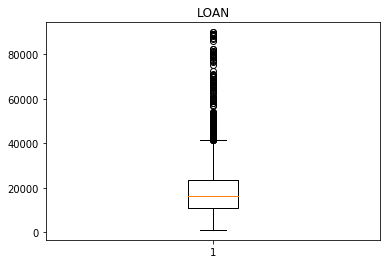

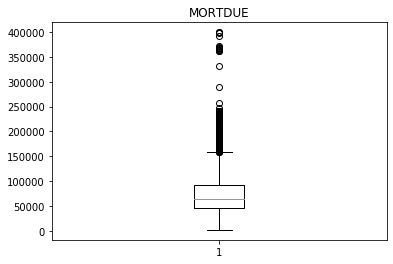

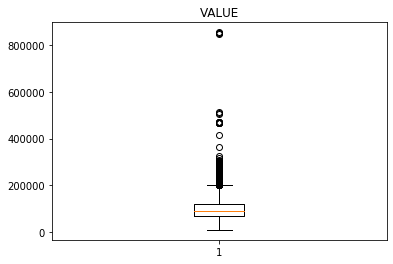

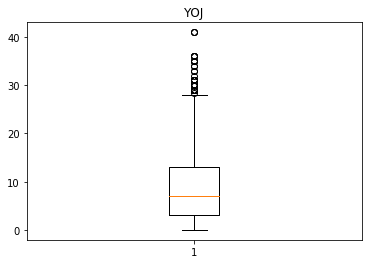

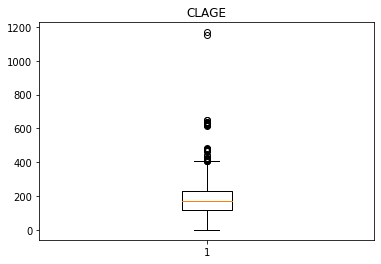

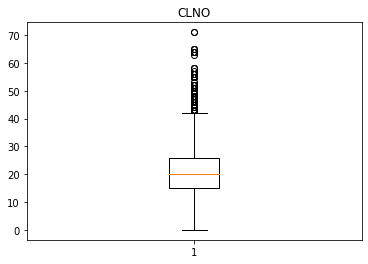

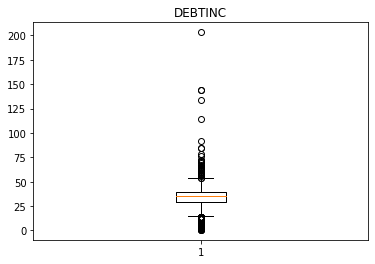

In [70]:
for column in america_num.columns:
    plt.boxplot(america_num[column].dropna())
    plt.title(column)
    plt.show()

In [64]:
nans = []
for i in america_num.columns:
    nans.append([i,len(america_num[i][america_num[i].isna()])])

In [65]:
nans

[['LOAN', 0],
 ['MORTDUE', 518],
 ['VALUE', 112],
 ['YOJ', 515],
 ['CLAGE', 308],
 ['CLNO', 222],
 ['DEBTINC', 1267]]

In [75]:
nans = []
for i in america_cat.columns:
    nans.append([i,len(america_cat[i][america_cat[i].isna()])])

In [76]:
nans

[['NINQ', 510], ['DELINQ', 580], ['DEROG', 708], ['REASON', 252], ['JOB', 279]]

In [86]:
americaCAT2 = america_cat.interpolate()

In [85]:
len(americaCAT2[americaCAT2.isna()])

252

In [87]:
americaCAT2

,NINQ,DELINQ,DEROG,REASON,JOB
0,1.0,0.0,0.0,HomeImp,Other
1,0.0,2.0,0.0,HomeImp,Other
2,1.0,0.0,0.0,HomeImp,Other
3,0.5,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,HomeImp,Office
5,1.0,0.0,0.0,HomeImp,Other
6,1.0,2.0,3.0,HomeImp,Other
7,0.0,0.0,0.0,HomeImp,Other
8,1.0,2.0,0.0,HomeImp,Other
9,0.0,0.0,0.0,HomeImp,Sales


In [83]:
americaCAT2

0    HomeImp
1    HomeImp
2    HomeImp
3        NaN
4    HomeImp
Name: REASON, dtype: object